In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

%matplotlib inline

In [2]:
data = pd.read_csv("archive.csv", sep=",")
data.head()

,Year,Honor,Name,Country,Birth Year,Death Year,Title,Category,Context
0,1927,Man of the Year,Charles Lindbergh,United States,1902.0,1974.0,US Air Mail Pilot,NaN,First Solo Transatlantic Flight
1,1928,Man of the Year,Walter Chrysler,United States,1875.0,1940.0,Founder of Chrysler,Economics,Chrysler/Dodge Merger
2,1929,Man of the Year,Owen D. Young,United States,1874.0,1962.0,Member of the German Reparations International...,Diplomacy,Young Plan
3,1930,Man of the Year,Mahatma Gandhi,India,1869.0,1948.0,NaN,Revolution,Salt March
4,1931,Man of the Year,Pierre Laval,France,1883.0,1945.0,Prime Minister of France,Politics,NaN


In [3]:
data['Year Award'] = data['Year'] - data['Birth Year']
data.head()

,Year,Honor,Name,Country,Birth Year,Death Year,Title,Category,Context,Year Award
0,1927,Man of the Year,Charles Lindbergh,United States,1902.0,1974.0,US Air Mail Pilot,NaN,First Solo Transatlantic Flight,25.0
1,1928,Man of the Year,Walter Chrysler,United States,1875.0,1940.0,Founder of Chrysler,Economics,Chrysler/Dodge Merger,53.0
2,1929,Man of the Year,Owen D. Young,United States,1874.0,1962.0,Member of the German Reparations International...,Diplomacy,Young Plan,55.0
3,1930,Man of the Year,Mahatma Gandhi,India,1869.0,1948.0,NaN,Revolution,Salt March,61.0
4,1931,Man of the Year,Pierre Laval,France,1883.0,1945.0,Prime Minister of France,Politics,NaN,48.0


In [4]:
category_counts = data['Category'].value_counts()
category_counts

Politics        43
War             20
Economics        7
Diplomacy        7
Technology       5
Revolution       5
Science          4
Space            4
Philanthropy     3
Religion         3
Environment      1
Media            1
Name: Category, dtype: int64

In [5]:
category = category_counts.index
category

Index([u'Politics', u'War', u'Economics', u'Diplomacy', u'Technology',
       u'Revolution', u'Science', u'Space', u'Philanthropy', u'Religion',
       u'Environment', u'Media'],
      dtype='object')

In [6]:
c_counts = category_counts.get_values()
c_counts

array([43, 20,  7,  7,  5,  5,  4,  4,  3,  3,  1,  1])

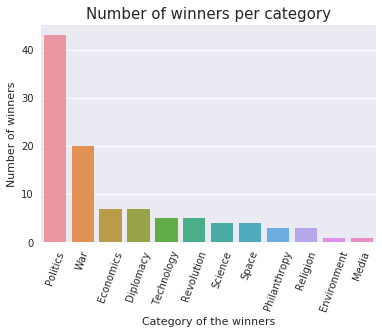

In [7]:
plt.xticks(rotation=70)
plt.xlabel('Category of the winners')
plt.ylabel('Number of winners')
plt.title('Number of winners per category', fontsize='15')
#plt.figure(figsize=(12,8))
barplot = sns.barplot(x=category, y=c_counts)

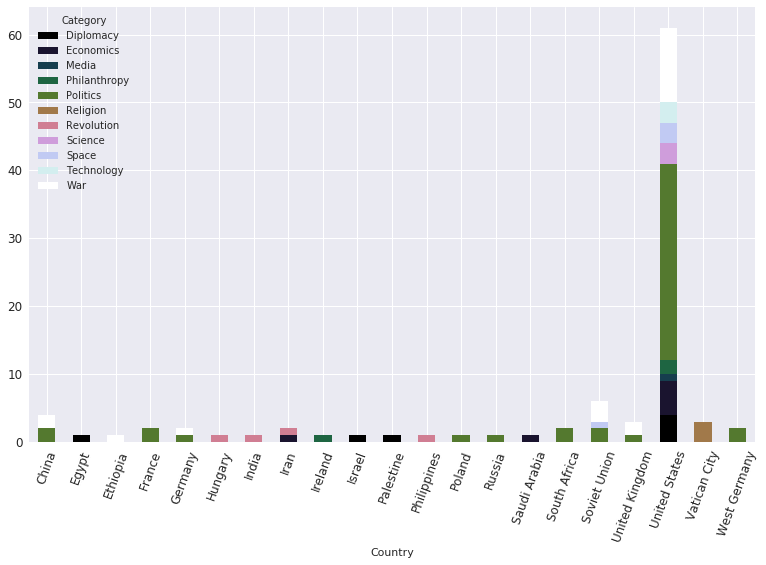

In [8]:
country_category_group = data.groupby(['Country','Category']).size().unstack(fill_value=0)
country_category_group.plot(kind='bar',legend=True,figsize=(13,8), stacked=True, colormap='cubehelix', rot=70, fontsize=12, grid=True)

In [9]:
countries_less_usa = data[data['Country'] != 'United States']

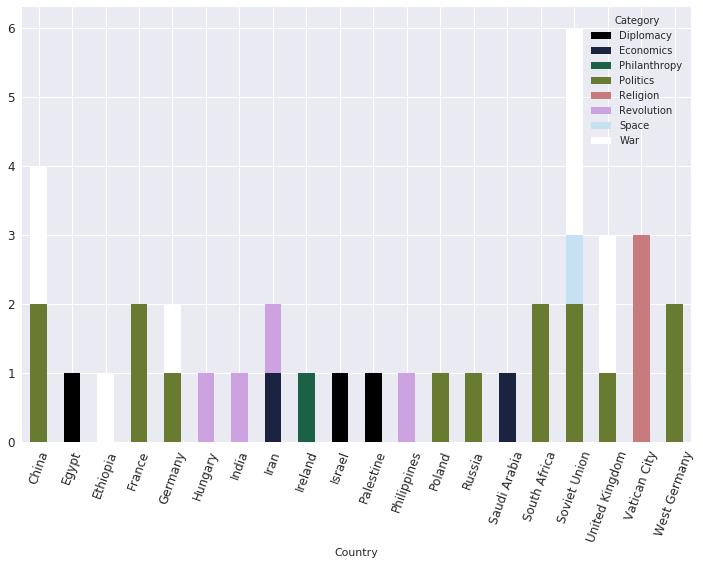

In [10]:
category_groupby_less_usa = countries_less_usa.groupby(['Country', 'Category']).size().unstack(fill_value=0)
category_groupby_less_usa.plot(kind='bar', stacked=True, figsize=(12,8), colormap='cubehelix', legend=True, rot=70, fontsize=12)